In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


# Common Terms related to dataset
Corpus(c) - Combination of all words in the dataset <br>
Vocabulary(v) - Unique words in corpus<br>
Document - Individual review <br>
Word - Individual word

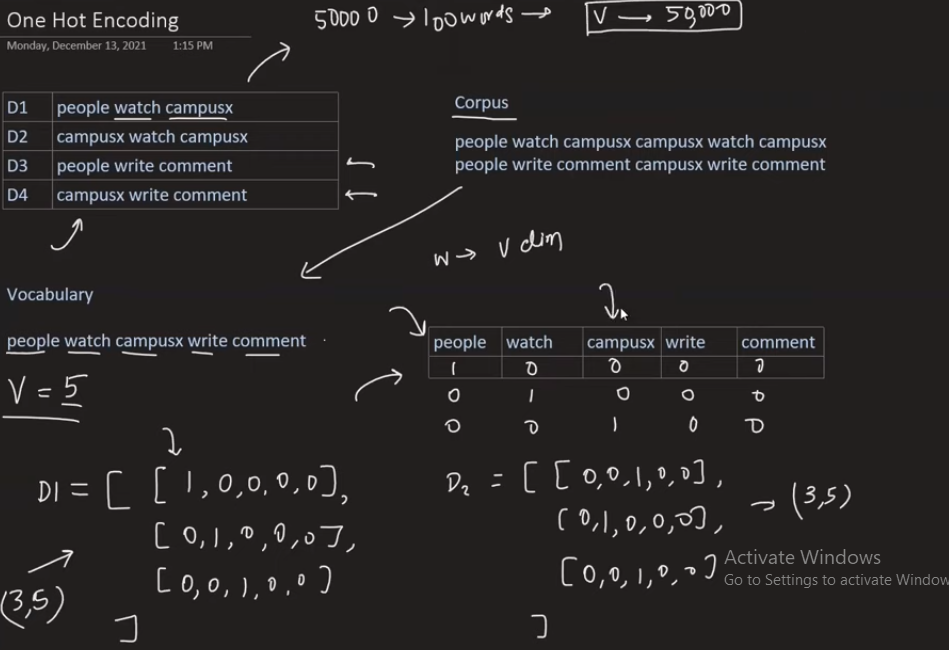

# Bag of words
- Order and context of words doesn't matter <br>
- Documents are converted into form of n-d vectors and the angle between them is considered to find similarities and differences in documents <br> <br>
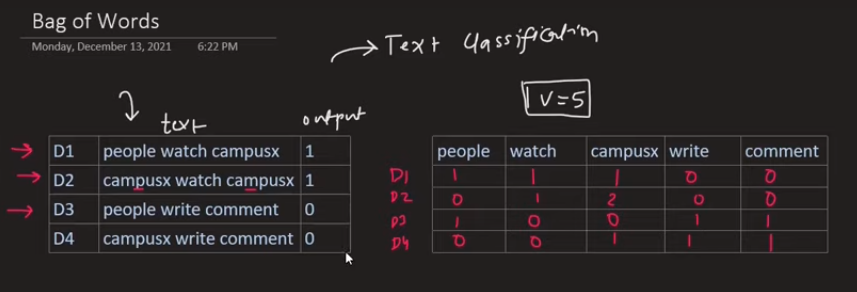

In [2]:
df = pd.DataFrame({'text':['people watch xyz','xyz watch xyz','people write comment','xyz write comment'],'output':[1,1,0,0]})

In [3]:
df

,text,output
0,people watch xyz,1
1,xyz watch xyz,1
2,people write comment,0
3,xyz write comment,0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [5]:
bow = cv.fit_transform(df['text'])

In [6]:
print(cv.vocabulary_)

{'people': 1, 'watch': 2, 'xyz': 4, 'write': 3, 'comment': 0}


In [7]:
print(bow[0].toarray())
print(bow[1].toarray())

[[0 1 1 0 1]]
[[0 0 1 0 2]]


In [8]:
cv.transform(["xyz watch and write xyz comment"]).toarray()

array([[1, 0, 1, 1, 2]])

***Advantages of bag of words*** <br> 
- handles out of vocabulary and fixed size problem <br> 
- also somewhat captures semantics as compared to one hot coding <br>

***Problems with bag of words***
- Sparsity <br>
- Out of Vocabulary - error is not thrown but you ignore the other words which might have provided some information <br>
- Ordering is not considered, but it can be important to understand meaning of a sentence <br>
- Consider the following sentences - "This movie is very good" <br>
and - "This movie is not very good" <br>
Altough both the sentences have opposite meaning but the frequencies of words is almost same thus bow will put them nearby in the vector thus considering there meaning to be similiar <br>

# N-Grams
- Able to understand semantics
- No way to handle out of vocabulary
- Slows down the process - as n increases, dimension also increases

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (2,2))

In [10]:
bow = cv.fit_transform(df['text'])

In [11]:
print(cv.vocabulary_)

{'people watch': 0, 'watch xyz': 2, 'xyz watch': 4, 'people write': 1, 'write comment': 3, 'xyz write': 5}


# Tf-Idf